In [35]:
%load_ext autoreload
%autoreload 2
from experiment_utils import *
from visualization_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
run_batch_sims(BanditExperimentGen, "bandit_exp_test_run2.pkl", 10)

100%|██████████| 6/6 [00:31<00:00,  5.31s/it]


In [77]:
df = pkl_to_df("treatment_ramcp_run6_initat3.pkl")

In [ ]:
df_rmcp = pkl_to_df("treatment_rmcp_run5.pkl")

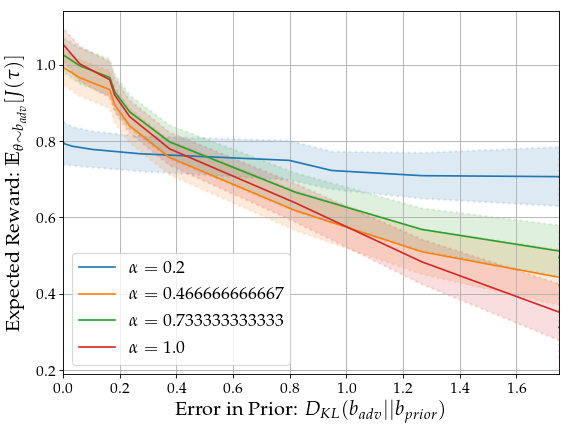

In [79]:
plot_robustness_curve(df) #, filename='figures/treatment_robustness.pdf')

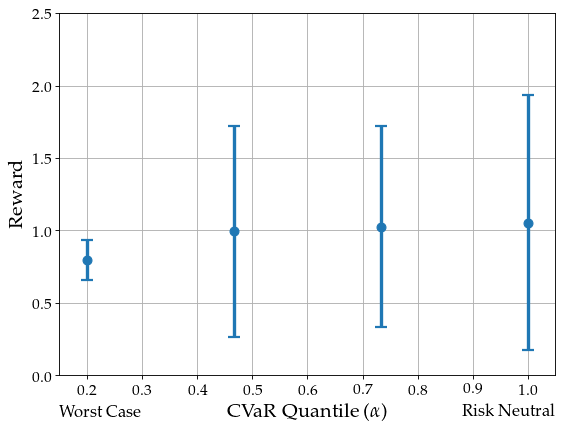

In [80]:
plot_spreads(df) #, filename='figures/treatment_spreads.pdf')

In [20]:
df = df.set_index(['agent.kwargs.alpha', 'mdp.param'])
df = df['reward']

In [21]:
mean_rewards = df.groupby(['agent.kwargs.alpha', 'mdp.param']).mean()

In [22]:
var_rewards = df.groupby(['agent.kwargs.alpha', 'mdp.param']).var()

In [23]:
cov_rewards = var_rewards.groupby(['agent.kwargs.alpha']).apply(np.diag)

In [24]:
mean_vec = mean_rewards.groupby(['agent.kwargs.alpha']).apply(np.array)

In [25]:
mean_vec

agent.kwargs.alpha
0.20     [1.0978, 1.1216, 1.168, 1.1096]
0.36    [1.1833, 1.1635, 1.4349, 1.0384]
0.52    [1.1558, 1.1376, 1.2686, 1.0015]
0.68      [1.2496, 1.1086, 1.256, 0.763]
0.84    [1.4062, 1.1923, 1.0398, 0.6273]
1.00     [1.5039, 1.1383, 1.0509, 0.461]
Name: reward, dtype: object

In [51]:
belief = [0.6, 0.4]
belief2 = [0.4, 0.6]

In [54]:
perturbed_perf = mean_vec.apply(lambda x: np.dot(x,belief))

In [48]:
N_rollouts = df.groupby(['agent.kwargs.alpha', 'mdp.param']).count()
perturbed_perf_cov = cov_rewards.apply(lambda x: np.dot(belief, np.dot(x, belief)))
perturbed_perf_std = (perturbed_perf_cov / N_rollouts.groupby('agent.kwargs.alpha').mean()).apply(np.sqrt)

In [49]:
perturbed_perf_std

agent.alpha
0.25    0.076665
0.50    0.090891
0.75    0.068127
1.00    0.088352
Name: reward, dtype: float64

In [57]:
perturbed_perf

agent.alpha
0.25    0.780
0.50    0.580
0.75    0.856
1.00    0.510
Name: reward, dtype: float64

In [55]:
perturbed_perf2 = mean_vec.apply(lambda x: np.dot(x,belief2))

In [58]:
pd.concat([perturbed_perf, perturbed_perf2]).groupby('agent.alpha').apply(np.array)

agent.alpha
0.25      [0.78, 0.62]
0.50      [0.58, 0.42]
0.75    [0.856, 0.534]
1.00      [0.51, 0.44]
Name: reward, dtype: object

In [60]:
df['agent.belief'].iloc[0]

(0.6, 0.4)

In [19]:
def random_transition_func(n_actions, spread, prng=np.random):
    base = np.eye(spread)
    rows_to_keep = prng.choice(spread, n_actions, replace=False)
    no_noise = base[rows_to_keep,:]
    matrix = no_noise + np.abs( 0.1*prng.randn(n_actions, spread) )
    matrix = matrix / np.sum(matrix, axis=1, keepdims=True)
    return matrix

In [24]:
prng = np.random.RandomState(42)
[random_transition_func(4,7,prng) for i in range(2)]

[array([[ 0.77177802,  0.02214942,  0.01938087,  0.07018556,  0.04034502,
          0.03647578,  0.03968533],
        [ 0.05134428,  0.70078377,  0.05280484,  0.04536367,  0.08467024,
          0.02378328,  0.04124992],
        [ 0.04102063,  0.1247876 ,  0.03671243,  0.03486043,  0.14927523,
          0.60621558,  0.0071281 ],
        [ 0.03636736,  0.04235183,  0.77241347,  0.02053435,  0.0448429 ,
          0.07207719,  0.0114129 ]]),
 array([[ 0.02615227,  0.08922917,  0.01890842,  0.08157069,  0.12751978,
          0.06110974,  0.59550993],
        [ 0.02216139,  0.05098503,  0.12554409,  0.03858532,  0.00174316,
          0.71592045,  0.04506057],
        [ 0.13147435,  0.62183183,  0.00541549,  0.02354   ,  0.05352938,
          0.05885649,  0.10535246],
        [ 0.08819006,  0.04105686,  0.05850512,  0.67595468,  0.08411725,
          0.01365241,  0.03852362]])]

In [17]:
np.arange(7) - 7 // 2

array([-3, -2, -1,  0,  1,  2,  3])